In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from functools import partial

In [2]:
# Import data, custom figure-making functions
sys.path.append('/mnt/d/orchards')
from figure_functions import *
from figure_constants import *
sys.path.append(installDir+'scripts')
from chartannotator import add_stat_annotation
multiple_comparisons_method = 'fdr_tsbh'

loading subjects...
loading samples...
loading segments...
loading genes...
loading SNPs...
loading transmission pairs...
loading transmission segments...
loading transmission SNPs...


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/mnt/d/orchards/h1n1/scripts/chartannotator.py:746: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
/mnt/d/orchards/h1n1/scripts/chartannotator.py:748: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'simple':


In [3]:
samples['age_categorical_3'] = np.nan
samples.loc[samples.age < 8, 'age_categorical_3'] = 'Under 8'
samples.loc[(samples.age >= 8)&(samples.age <= 18), 'age_categorical_3'] = '8 to 18'
samples.loc[samples.age > 18, 'age_categorical_3'] = 'Over 18'

samples['recieved_flu_vaccine'] = samples['recieved_flu_vaccine'].map({0:'Unvaccinated', 1:'Vaccinated', np.nan:np.nan})

genes['recieved_flu_vaccine'] = genes['recieved_flu_vaccine'].map({0:'Unvaccinated', 1:'Vaccinated', np.nan:np.nan})

In [4]:
id_columns = ['sampleID', 'subtype','season','age','age_category','recieved_flu_vaccine','clade','subclade']
sample_N_stats = ['nonsynon_snps_per_day_samp','Xue_nonsynon_divergence','num_of_nonsynon_muts','nonsynon_mutation_rate_samp','Xue_nonsynon_divergence_per_day','nonsynon_divergence_rate']
sample_S_stats = ['synon_snps_per_day_samp','Xue_synon_divergence','num_of_synon_muts','synon_mutation_rate_samp','Xue_synon_divergence_per_day','synon_divergence_rate']

segment_N_stats = ['nonsynon_snps_per_day_seg', 'Xue_nonsynon_divergence_segment', 'num_of_nonsynon_muts_segment', 'nonsynon_mutation_rate_seg', 'nonsynon_divergence_per_day_seg', 'nonsynon_divergence_rate_seg']
segment_S_stats = [col.replace('nonsynon_','synon_') for col in segment_N_stats]

gene_N_stats = [col.replace('_segment','').replace('_seg','')+'_gene' for col in segment_N_stats]
gene_S_stats = [col.replace('_segment','').replace('_seg','')+'_gene' for col in segment_S_stats]

sample_N_stats.append('piN_sample')
sample_S_stats.append('piS_sample')
segment_N_stats.append('piN_segment')
segment_S_stats.append('piS_segment')
gene_N_stats.append('piN_gene')
gene_S_stats.append('piS_gene')

N_sample_renameDict = {col: col.replace('nonsynon_', '').replace('piN','pi') for col in sample_N_stats}
S_sample_renameDict = {col: col.replace('synon_', '').replace('piS','pi') for col in sample_S_stats}

N_segment_renameDict = {col: col.replace('nonsynon_', '').replace('piN','pi') for col in segment_N_stats}
S_segment_renameDict = {col: col.replace('synon_', '').replace('piS','pi') for col in segment_S_stats}

N_gene_renameDict = {col: col.replace('nonsynon_', '').replace('piN','pi') for col in gene_N_stats}
S_gene_renameDict = {col: col.replace('synon_', '').replace('piS','pi') for col in gene_S_stats}

In [5]:
samples.loc[samples.sampleID.isin(N_samples.loc[N_samples.pi_sample==0, 'sampleID'])]

,sampleID,ptID,subtype,CT,mapped,sample_date,decimalDate,seasonalDate,week,season,...,synon_mutation_rate_samp,nonsynon_mutation_rate_samp,Xue_divergence_per_day,Xue_synon_divergence_per_day,Xue_nonsynon_divergence_per_day,divergence_rate,synon_divergence_rate,nonsynon_divergence_rate,log(piN/piS),age_categorical_3
11,17VR014029,939.0,H3N2,18.76,True,2017-12-08 00:00:00,2017.934247,0.434247,49,17-18,...,0.000194,0.000000,0.013571,0.013571,0.000000,1.010757e-06,3.678806e-06,0.000000e+00,-0.756513,8 to 18
55,17VR014896,1025.0,H3N2,25.21,True,2017-12-26 00:00:00,2017.983562,0.483562,52,17-18,...,0.000080,0.000000,0.031676,0.031676,0.000000,2.359162e-06,8.586849e-06,0.000000e+00,-1.403362,8 to 18
60,17VR015078,1031.0,H3N2,24.54,True,2017-12-28 00:00:00,2017.989041,0.489041,52,17-18,...,0.000123,0.000000,0.005773,0.005773,0.000000,4.299343e-07,1.564439e-06,0.000000e+00,-0.865191,8 to 18
95,18VR002212,1087.0,H3N2,18.95,True,2018-01-20 00:00:00,2018.052055,0.552055,3,17-18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,Under 8
173,18VR005308,1236.2,H3N2,29.07,True,2018-03-01 00:00:00,2018.161644,0.661644,9,17-18,...,0.000123,0.000000,0.006386,0.006386,0.000000,4.756359e-07,1.730965e-06,0.000000e+00,-0.903283,Over 18
178,18VR005799,1272.0,Influenza B,24.22,True,2018-03-20 00:00:00,2018.213699,0.713699,12,17-18,...,0.000110,0.000044,0.011583,0.007333,0.004250,8.451903e-07,1.929799e-06,4.493099e-07,-0.719080,8 to 18
183,18VR006203,1286.0,Influenza B,19.50,True,2018-03-30 00:00:00,2018.241096,0.741096,13,17-18,...,0.000000,0.000014,0.003338,0.000000,0.003338,2.435489e-07,0.000000e+00,3.528995e-07,0.000000,Under 8
184,18VR006427,1284.1,Influenza B,25.13,True,2018-03-30 00:00:00,2018.241096,0.741096,13,17-18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,Over 18
196,19VR003002,1577.0,H3N2,22.87,True,2019-02-13 00:00:00,2019.117808,0.617808,7,18-19,...,0.000339,0.000000,0.039542,0.039542,0.000000,2.944937e-06,1.071163e-05,0.000000e+00,-1.377332,8 to 18
211,19VR003373,1616.0,H3N2,27.42,True,2019-02-20 00:00:00,2019.136986,0.636986,8,18-19,...,0.000246,0.000000,0.055341,0.036773,0.000000,4.121614e-06,9.964692e-06,0.000000e+00,-1.785403,Under 8


In [6]:
N_samples = samples[id_columns+sample_N_stats].rename(columns=N_sample_renameDict)
S_samples = samples[id_columns+sample_S_stats].rename(columns=S_sample_renameDict)
print (S_samples.columns)
N_segments = segments[['segment'] + id_columns+segment_N_stats].rename(columns=N_segment_renameDict)
S_segments = segments[['segment'] +id_columns+segment_S_stats].rename(columns=S_segment_renameDict)

N_genes = genes[['segment', 'product'] +id_columns+gene_N_stats].rename(columns=N_gene_renameDict)
S_genes = genes[['segment', 'product'] +id_columns+gene_S_stats].rename(columns=S_gene_renameDict)

Index(['sampleID', 'subtype', 'season', 'age', 'age_category',
       'recieved_flu_vaccine', 'clade', 'subclade', 'snps_per_day_samp',
       'Xue_divergence', 'num_of_muts', 'mutation_rate_samp',
       'Xue_divergence_per_day', 'divergence_rate', 'pi_sample'],
      dtype='object')


In [7]:
N_samples['Synon_Nonsynon'] = N_segments['Synon_Nonsynon'] = N_genes['Synon_Nonsynon'] = 'Nonsynon'
S_samples['Synon_Nonsynon'] = S_segments['Synon_Nonsynon'] = S_genes['Synon_Nonsynon'] = 'Synon'

In [8]:
NS_samples = N_samples.append(S_samples)
NS_segments = N_segments.append(S_segments)
NS_genes = N_genes.append(S_genes)

In [9]:
S_sample_renameDict

{'synon_snps_per_day_samp': 'snps_per_day_samp',
 'Xue_synon_divergence': 'Xue_divergence',
 'num_of_synon_muts': 'num_of_muts',
 'synon_mutation_rate_samp': 'mutation_rate_samp',
 'Xue_synon_divergence_per_day': 'Xue_divergence_per_day',
 'synon_divergence_rate': 'divergence_rate',
 'piS_sample': 'pi_sample'}

In [10]:
def extract_exponent(x):
    return np.floor(np.log10(x))

def round_to_exponent(x, high=False):
    if high:
        return 10**extract_exponent(x)+1
    else:
        return 10**extract_exponent(x)

from scipy.stats import truncnorm

def get_truncated_normal_distribution(mean=0, sd=1, low=0, upp=10, n=1):
    dist = truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
    return dist.rvs(n)
    
def set_log_ax_ytick_range(ax, r=1):
    t=np.log10(ax.get_yticks())
    new_t = 10**np.arange(t[0], t[-1], step=r)
    ax.set_yticks(new_t)
    return ax
    
def swarmplot_with_zeros(figargs, fig, spacing=.2, gap_between_data_and_zero=0, dotsize=5, jitter_zeros=False):
    y = figargs['y']
    figargs['data'] = data = figargs['data'].copy()
    
    log_new_zero = determine_log_zero(figargs, spacing)-gap_between_data_and_zero
    print (log_new_zero)
    line_placement = 10**(log_new_zero+spacing)
    print (np.log10(line_placement))
    ax_bottom = 10**(log_new_zero-spacing)
    print(np.log10(ax_bottom))
    
    if not jitter_zeros:
        figargs['data'][y] = data[y].replace(0, 10**log_new_zero)
    else:
        data.loc[data[y] == 0, y] = jitter(data.loc[data[y] == 0, y], log_new_zero, (np.log10(ax_bottom*1.05), np.log10(line_placement*.95)))
        figargs['data'] = data
    print(y)
    print(data.loc[data[y] == 0, 'mutation_rate_samp'])
    print(figargs['data'].loc[figargs['data'][y] == 0, 'mutation_rate_samp'])
    ax = sns.swarmplot(**figargs, size=dotsize)
    ax.axhline(line_placement, color='black', linestyle='--')

    old_ylim = ax.get_ylim()
    fig.canvas.draw_idle()
    add_zero_y_axis(ax, log_new_zero)
    ax.set_ylim(ax_bottom, old_ylim[1])

    return ax

def jitter(points, mid, ranges):
    low, high = ranges
    sd = (high-low)*.34
    return np.power(10, np.array(get_truncated_normal_distribution(mid, sd, low, high, len(points))))

def render_ax(ax):
    renderer = plt.gcf().canvas.renderer
    ax.draw(renderer)

def determine_log_zero(figargs, spacing):
    y = figargs['y']
    figargs['data'] = data = figargs['data'].copy()
    min_nonzero_y = data.loc[data[y]>0, y].min()
    log_min_y = np.log10(round_to_exponent(min_nonzero_y))-spacing
    return log_min_y

def add_zero_y_axis(ax, log_new_zero):
    yticks = ax.get_yticks()
    yticks[1] = 10**log_new_zero
#     ax.set_yticks(yticks)
    labels = [tick._text for tick in ax.get_yticklabels()]
    print(yticks)
    print()
    print(labels)
#     print (f'{len(yticks)})
    labels[1] = '0'
    ax.set_yticks(yticks)
    ax.set_yticklabels(labels)
    return ax

In [11]:
sns.set_theme(context='paper', style='white', font_scale=3)
pi = '\u03C0'
rcParams['font.sans-serif'] = 'Myriad Pro'


ax_letter_args = {'pad':30}
x_labelpad = 12
y_labelpad = 12

In [12]:
font_annotation_size = rcParams['font.size'] * .66
sigBar = partial(add_stat_annotation, **{'fontsize':font_annotation_size})

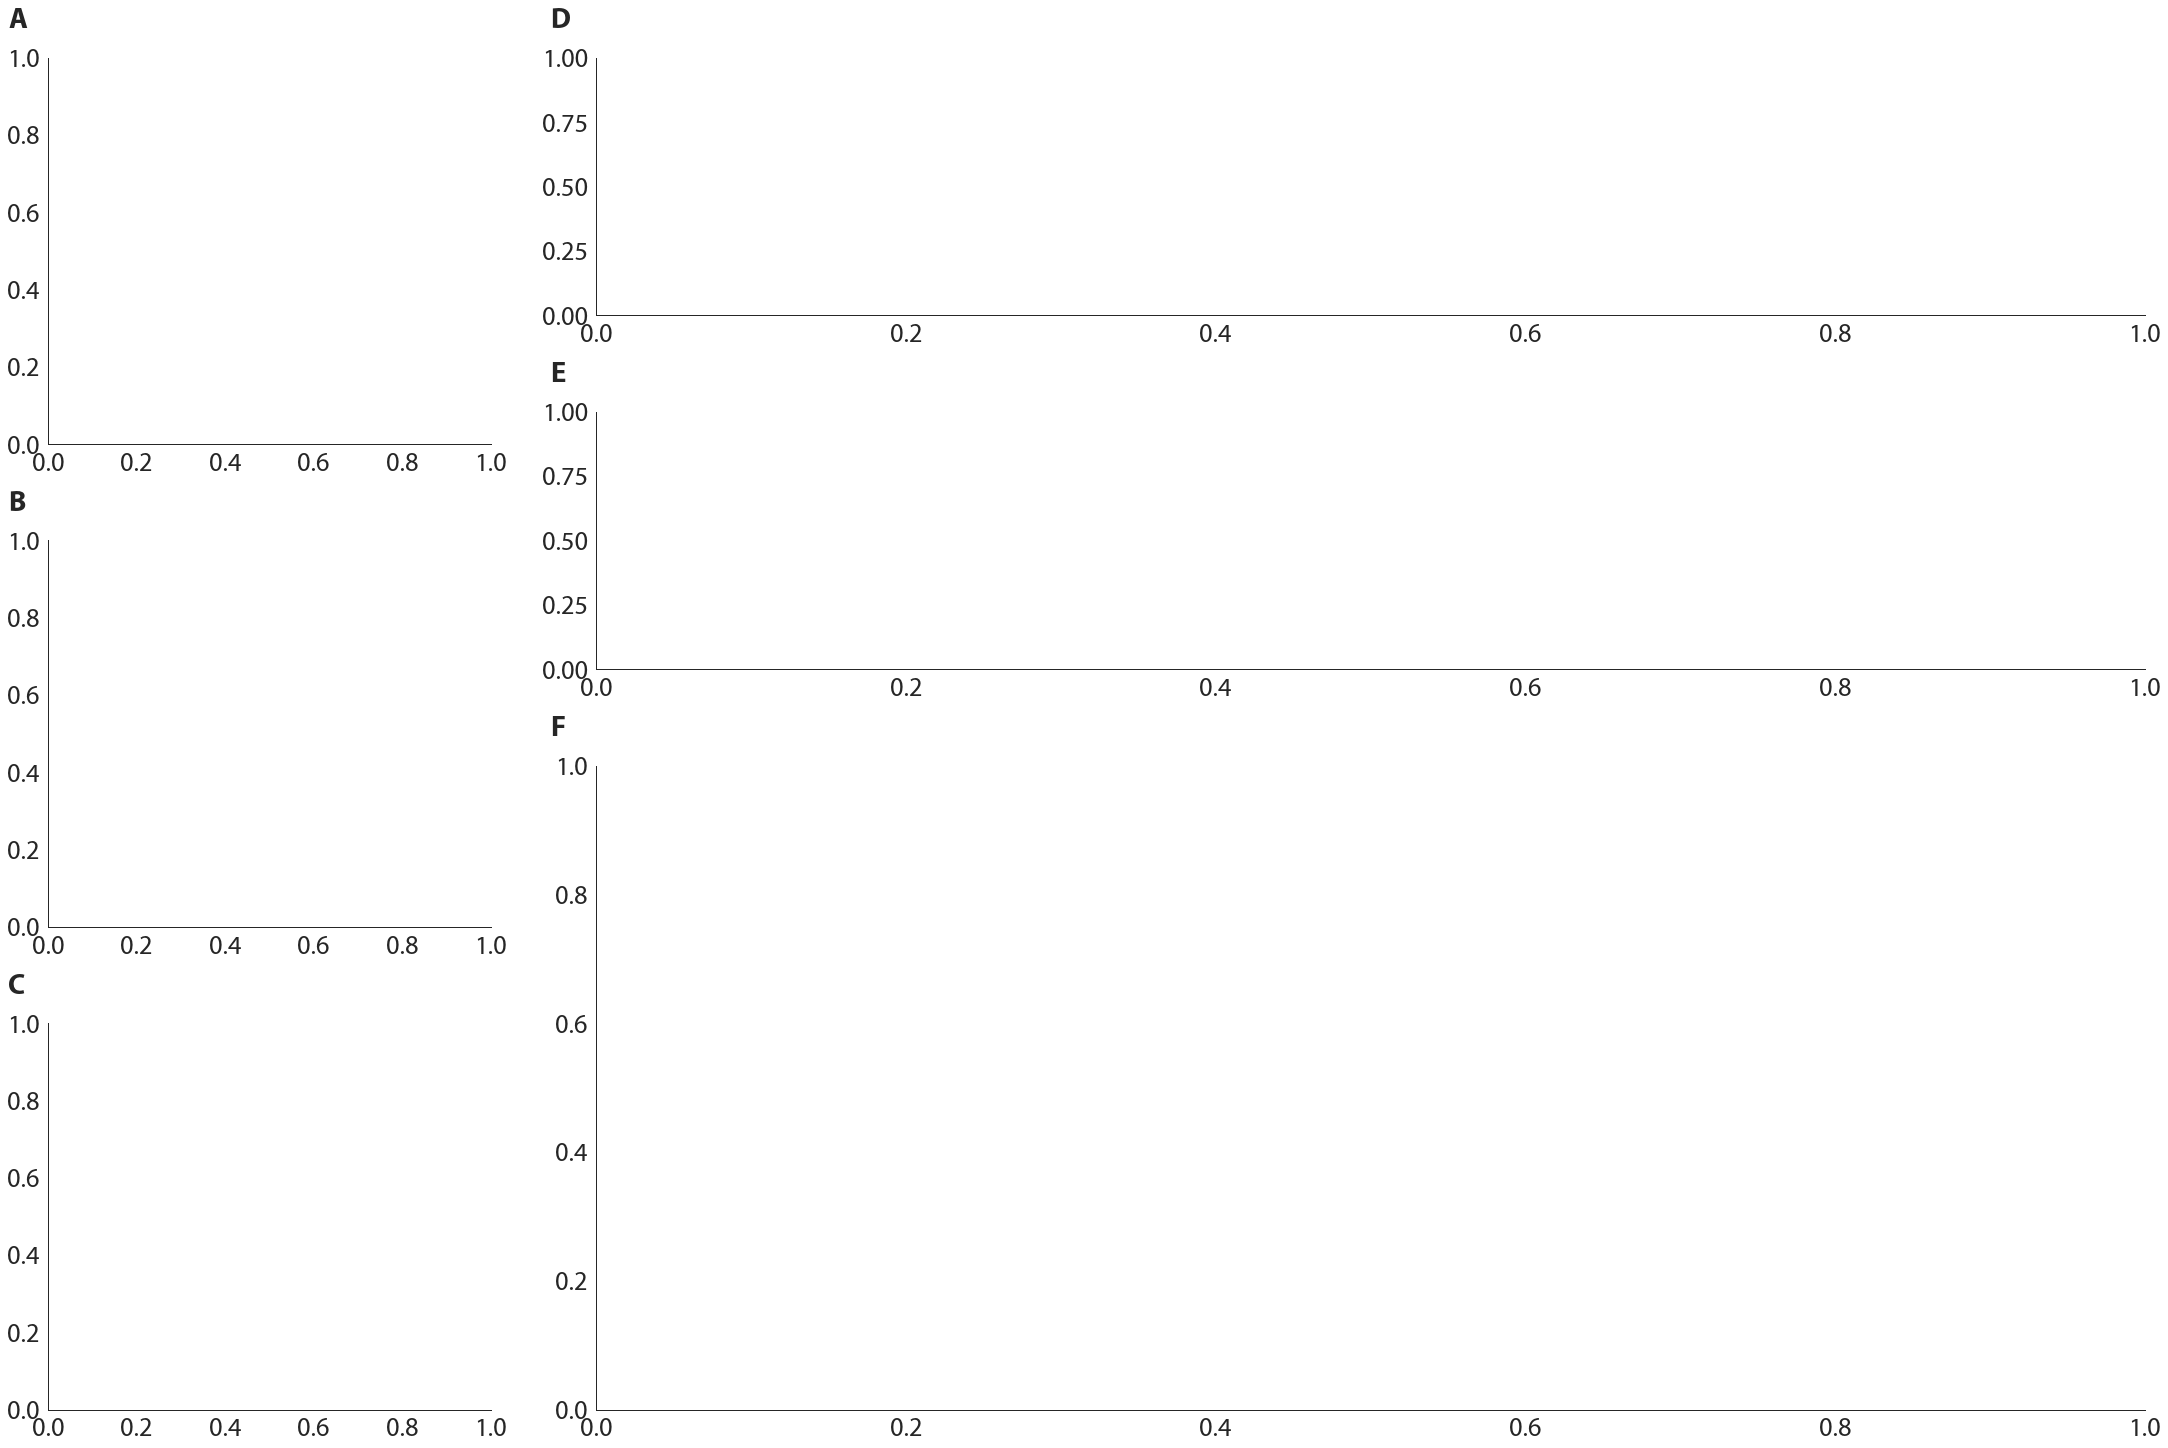

In [13]:
fig2 = plt.figure(figsize = (30,20), constrained_layout=True)  #30,20
fig2.set_constrained_layout_pads(hspace=0.05, wspace=0.12)
gs = GridSpec(9,9,fig2)

# ax2a = fig2.add_subplot(gs[0:2, 0])
# ax2b = fig2.add_subplot(gs[0:2, 1])
# ax2c = fig2.add_subplot(gs[0:2, 2])
# ax2d = fig2.add_subplot(gs[2:4, :])
# ax2e = fig2.add_subplot(gs[4:6, :])
# ax2f = fig2.add_subplot(gs[6:, :])


ax2a = fig2.add_subplot(gs[0:3, 0:2])
ax2b = fig2.add_subplot(gs[3:6, 0:2])
ax2c = fig2.add_subplot(gs[6:9, 0:2])
# _ = fig2.add_subplot(gs[8, 0:2])
ax2d = fig2.add_subplot(gs[0:2, 2:])
ax2e = fig2.add_subplot(gs[2:4, 2:])
ax2f = fig2.add_subplot(gs[4:9, 2:])


plt.rcParams['axes.titleweight'] = 'bold'
sns.despine(fig2)

figure_letter_x_offset = -0.09

ax2a.set_title('A', loc='left', **ax_letter_args).set_x(figure_letter_x_offset)
ax2b.set_title('B', loc='left', **ax_letter_args).set_x(figure_letter_x_offset)
ax2c.set_title('C', loc='left', **ax_letter_args).set_x(figure_letter_x_offset)
ax2d.set_title('D', loc='left', **ax_letter_args).set_x(figure_letter_x_offset/3)
ax2e.set_title('E', loc='left', **ax_letter_args).set_x(figure_letter_x_offset/3)
ax2f.set_title('F', loc='left', **ax_letter_args).set_x(figure_letter_x_offset/3)
# ax2g.set_title('G', loc='left', **ax_letter_args).set_x(figure_letter_x_offset*.66)

-6.45
-6.25
-6.65
pi_sample
11     0.000000
55     0.000000
60     0.000000
95     0.000000
173    0.000000
178    0.000044
183    0.000014
184    0.000000
196    0.000000
211    0.000000
216    0.000000
226    0.000000
231    0.000000
250    0.000000
262    0.000000
306    0.000000
329    0.000000
1      0.000077
3      0.000000
4      0.000000
24     0.000000
45     0.000000
62     0.000000
95     0.000000
121    0.000000
161    0.000000
163    0.000080
166         NaN
177    0.000000
181    0.000000
182    0.000000
183    0.000000
184    0.000000
188    0.000000
225    0.000000
226    0.000000
247    0.000000
277    0.000000
297    0.000000
303    0.000000
306    0.000000
326    0.000000
327    0.000000
334    0.000000
Name: mutation_rate_samp, dtype: float64
Series([], Name: mutation_rate_samp, dtype: float64)
[1.00000000e-07 3.54813389e-07 1.00000000e-05 1.00000000e-04
 1.00000000e-03 1.00000000e-02 1.00000000e-01]

['$\\mathdefault{10^{-7}}$', '$\\mathdefault{10^{-6}}$', '$\\math

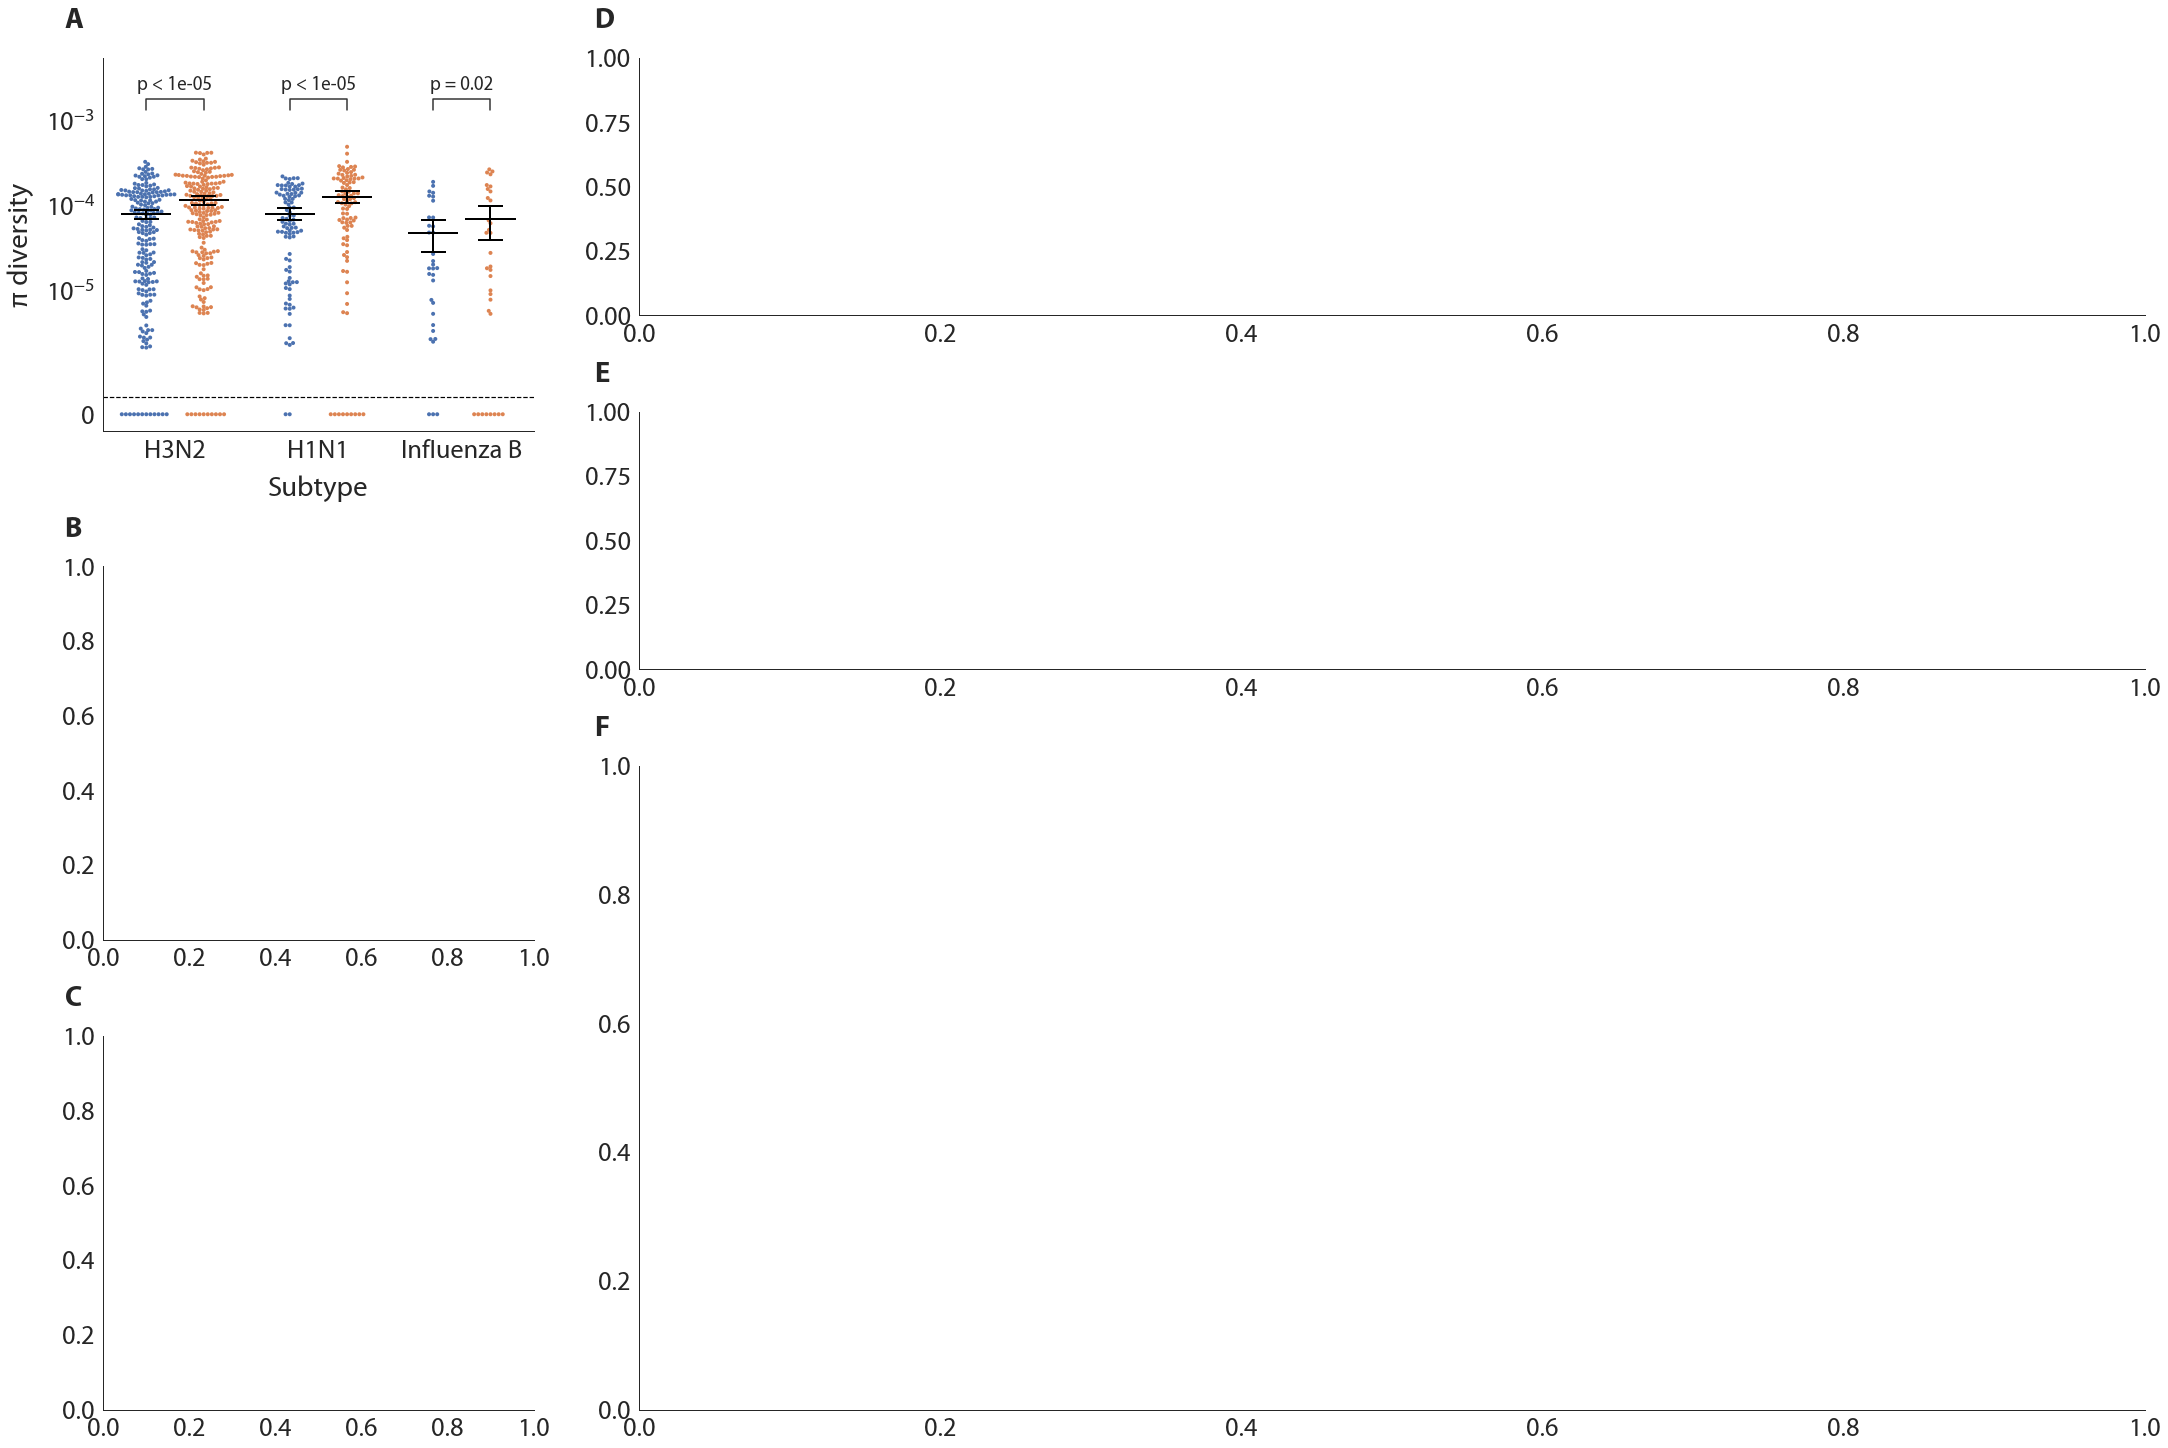

<Figure size 432x288 with 0 Axes>

In [14]:
#2a: piN/piS by subtype
# fig, ax2a = plt.subplots()
fig_args = {'x': 'subtype',
            'y': 'pi_sample',
            'hue':'Synon_Nonsynon',
            'data': NS_samples.loc[NS_samples.pi_sample < 1],
            'order': subtypeOrder,
            'hue_order':NS_order,
            'palette':palettes['subtype'], 
            'dodge':True,
            'ax': ax2a}

ax2a.set_yscale('log')
ax2a.set_ylim(1e-6,5e-3)
ax2a = swarmplot_with_zeros(fig_args, fig2, spacing=.2, gap_between_data_and_zero=0.25, dotsize=4, jitter_zeros=False)
# ax2a = sns.swarmplot(palette = palettes['subtype'], dodge=True, **fig_args)

del fig_args['palette']
del fig_args['dodge']

addStatsLines(**fig_args)

# comparisons = [(('H3N2','Nonsynon'),('H1N1','Nonsynon')),(('Influenza B','Nonsynon'),('H3N2','Nonsynon')),(('Influenza B','Nonsynon'),('H1N1','Nonsynon'))]

comparisons = [((subtype,'Synon'),(subtype,'Nonsynon')) for subtype in NS_samples.subtype.unique()]

sigBar(test='paired_bootstrap',box_pairs=comparisons, **fig_args, use_fixed_offset_from_top=True)

ax2a.set_ylabel(f'{pi} diversity', labelpad=x_labelpad)
ax2a.set_xlabel('Subtype', labelpad=y_labelpad)
ax2a.get_legend().remove()
fig2

-5.65
-5.45
-5.8500000000000005
mutation_rate_samp
11     0.0
55     0.0
60     0.0
95     0.0
173    0.0
184    0.0
196    0.0
211    0.0
216    0.0
226    0.0
231    0.0
250    0.0
262    0.0
306    0.0
329    0.0
3      0.0
4      0.0
24     0.0
45     0.0
62     0.0
95     0.0
121    0.0
161    0.0
177    0.0
181    0.0
182    0.0
183    0.0
184    0.0
188    0.0
225    0.0
226    0.0
247    0.0
252    0.0
277    0.0
297    0.0
303    0.0
306    0.0
326    0.0
327    0.0
334    0.0
Name: mutation_rate_samp, dtype: float64
Series([], Name: mutation_rate_samp, dtype: float64)
[1.00000000e-07 2.23872114e-06 1.00000000e-05 1.00000000e-04
 1.00000000e-03 1.00000000e-02 1.00000000e-01]

['$\\mathdefault{10^{-7}}$', '$\\mathdefault{10^{-6}}$', '$\\mathdefault{10^{-5}}$', '$\\mathdefault{10^{-4}}$', '$\\mathdefault{10^{-3}}$', '$\\mathdefault{10^{-2}}$', '$\\mathdefault{10^{-1}}$']
['H3N2', 'H1N1', 'Influenza B']
['H3N2', 'H1N1', 'Influenza B']
bootstrapping...
Influenza B_Synon: 0.0001670

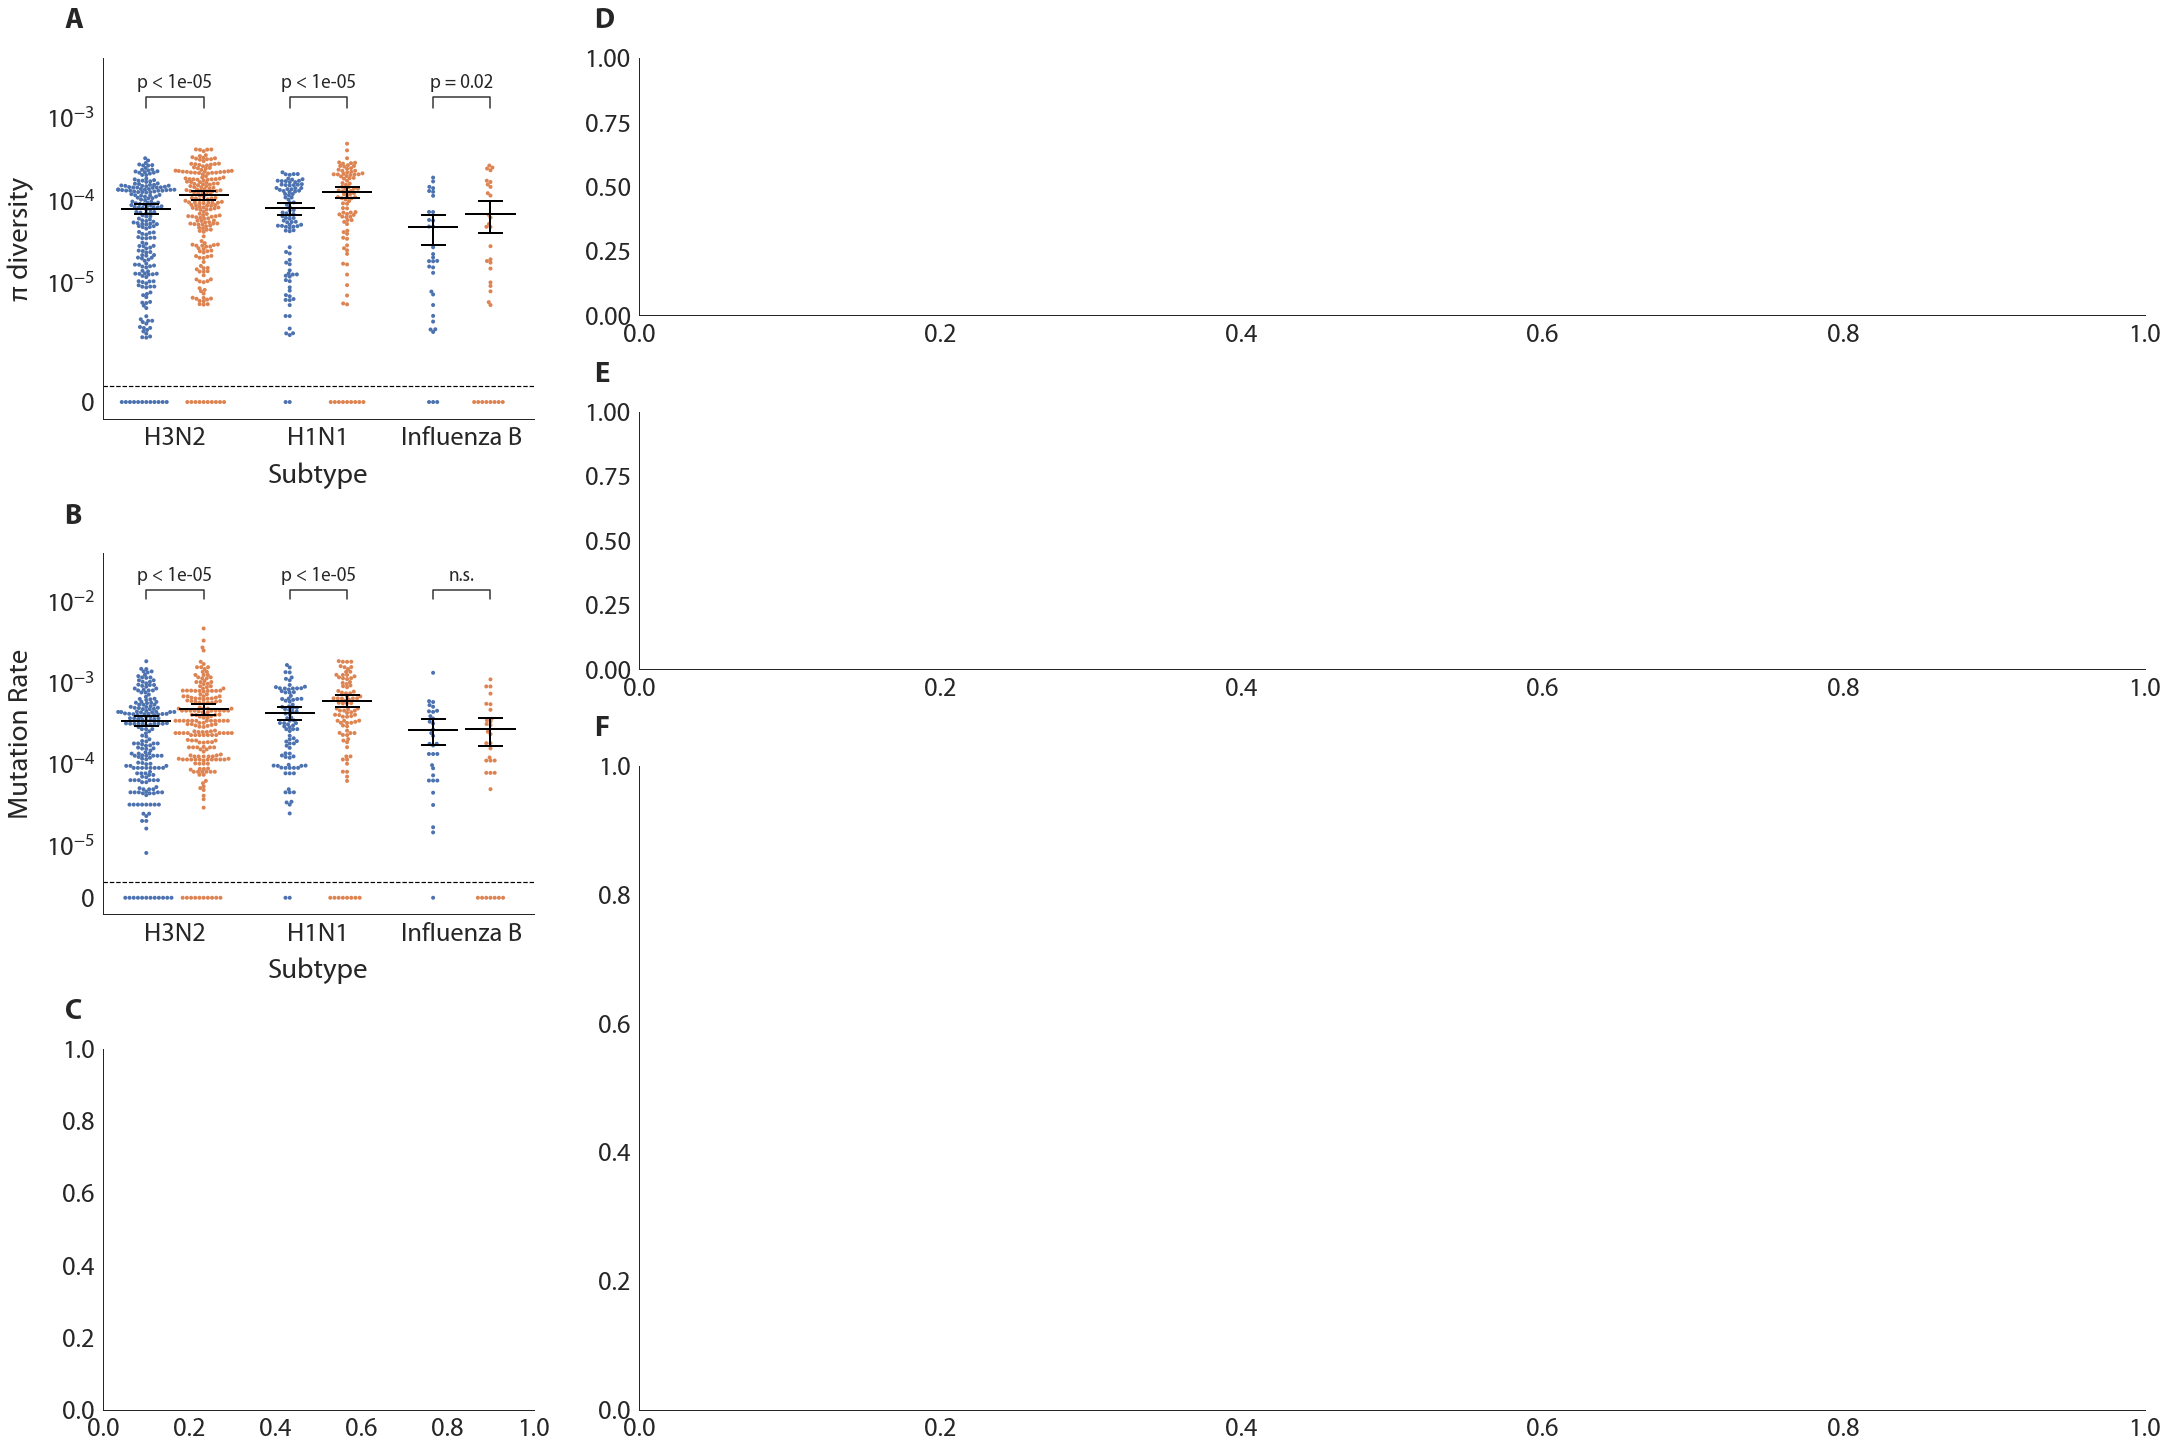

<Figure size 432x288 with 0 Axes>

In [15]:
#2b: N/S Mutation rate by subtype
# fig, ax2b = plt.subplots()
# ax2b.clear()
math_args = {'x': 'subtype',
            'y': 'mutation_rate_samp',
            'hue':'Synon_Nonsynon',
            'data': NS_samples,
            'order': subtypeOrder,
            'hue_order':NS_order,
            'palette':palettes['subtype'], 
            'dodge':True,
            'ax': ax2b}

fig_args = math_args.copy()

fig_args['data'] = NS_samples.loc[NS_samples.mutation_rate_samp >=0]

ax2b.set_yscale('log')

ax2b = swarmplot_with_zeros(fig_args, fig2, spacing=.2, gap_between_data_and_zero=-.55, dotsize=4, jitter_zeros=False)

# ax2a.set_ylim(1e-7,5e-3)

del math_args['palette']
del math_args['dodge']

addStatsLines(**math_args)

# comparisons = [(('H3N2','Nonsynon'),('H1N1','Nonsynon')),(('Influenza B','Nonsynon'),('H3N2','Nonsynon')),(('Influenza B','Nonsynon'),('H1N1','Nonsynon'))]

comparisons = [((subtype,'Synon'),(subtype,'Nonsynon')) for subtype in NS_samples.subtype.unique()]

sigBar(test='paired_bootstrap',box_pairs=comparisons, **math_args, use_fixed_offset_from_top=True)

ax2b.set_ylabel(f'Mutation Rate', labelpad=x_labelpad)
ax2b.set_xlabel('Subtype', labelpad=y_labelpad)
ax2b.get_legend().remove()
fig2

-7.45
-7.25
-7.65
divergence_rate
11     0.0
55     0.0
60     0.0
95     0.0
173    0.0
184    0.0
196    0.0
211    0.0
216    0.0
226    0.0
231    0.0
250    0.0
262    0.0
306    0.0
329    0.0
3      0.0
4      0.0
24     0.0
45     0.0
62     0.0
95     0.0
121    0.0
161    0.0
177    0.0
181    0.0
182    0.0
183    0.0
184    0.0
188    0.0
225    0.0
226    0.0
247    0.0
252    0.0
277    0.0
297    0.0
303    0.0
306    0.0
326    0.0
327    0.0
334    0.0
Name: mutation_rate_samp, dtype: float64
Series([], Name: mutation_rate_samp, dtype: float64)
[1.00000000e-09 3.54813389e-08 1.00000000e-07 1.00000000e-06
 1.00000000e-05 1.00000000e-04 1.00000000e-03 1.00000000e-02]

['$\\mathdefault{10^{-9}}$', '$\\mathdefault{10^{-8}}$', '$\\mathdefault{10^{-7}}$', '$\\mathdefault{10^{-6}}$', '$\\mathdefault{10^{-5}}$', '$\\mathdefault{10^{-4}}$', '$\\mathdefault{10^{-3}}$', '$\\mathdefault{10^{-2}}$']
['H3N2', 'H1N1', 'Influenza B']
['H3N2', 'H1N1', 'Influenza B']
bootstrapping...
In

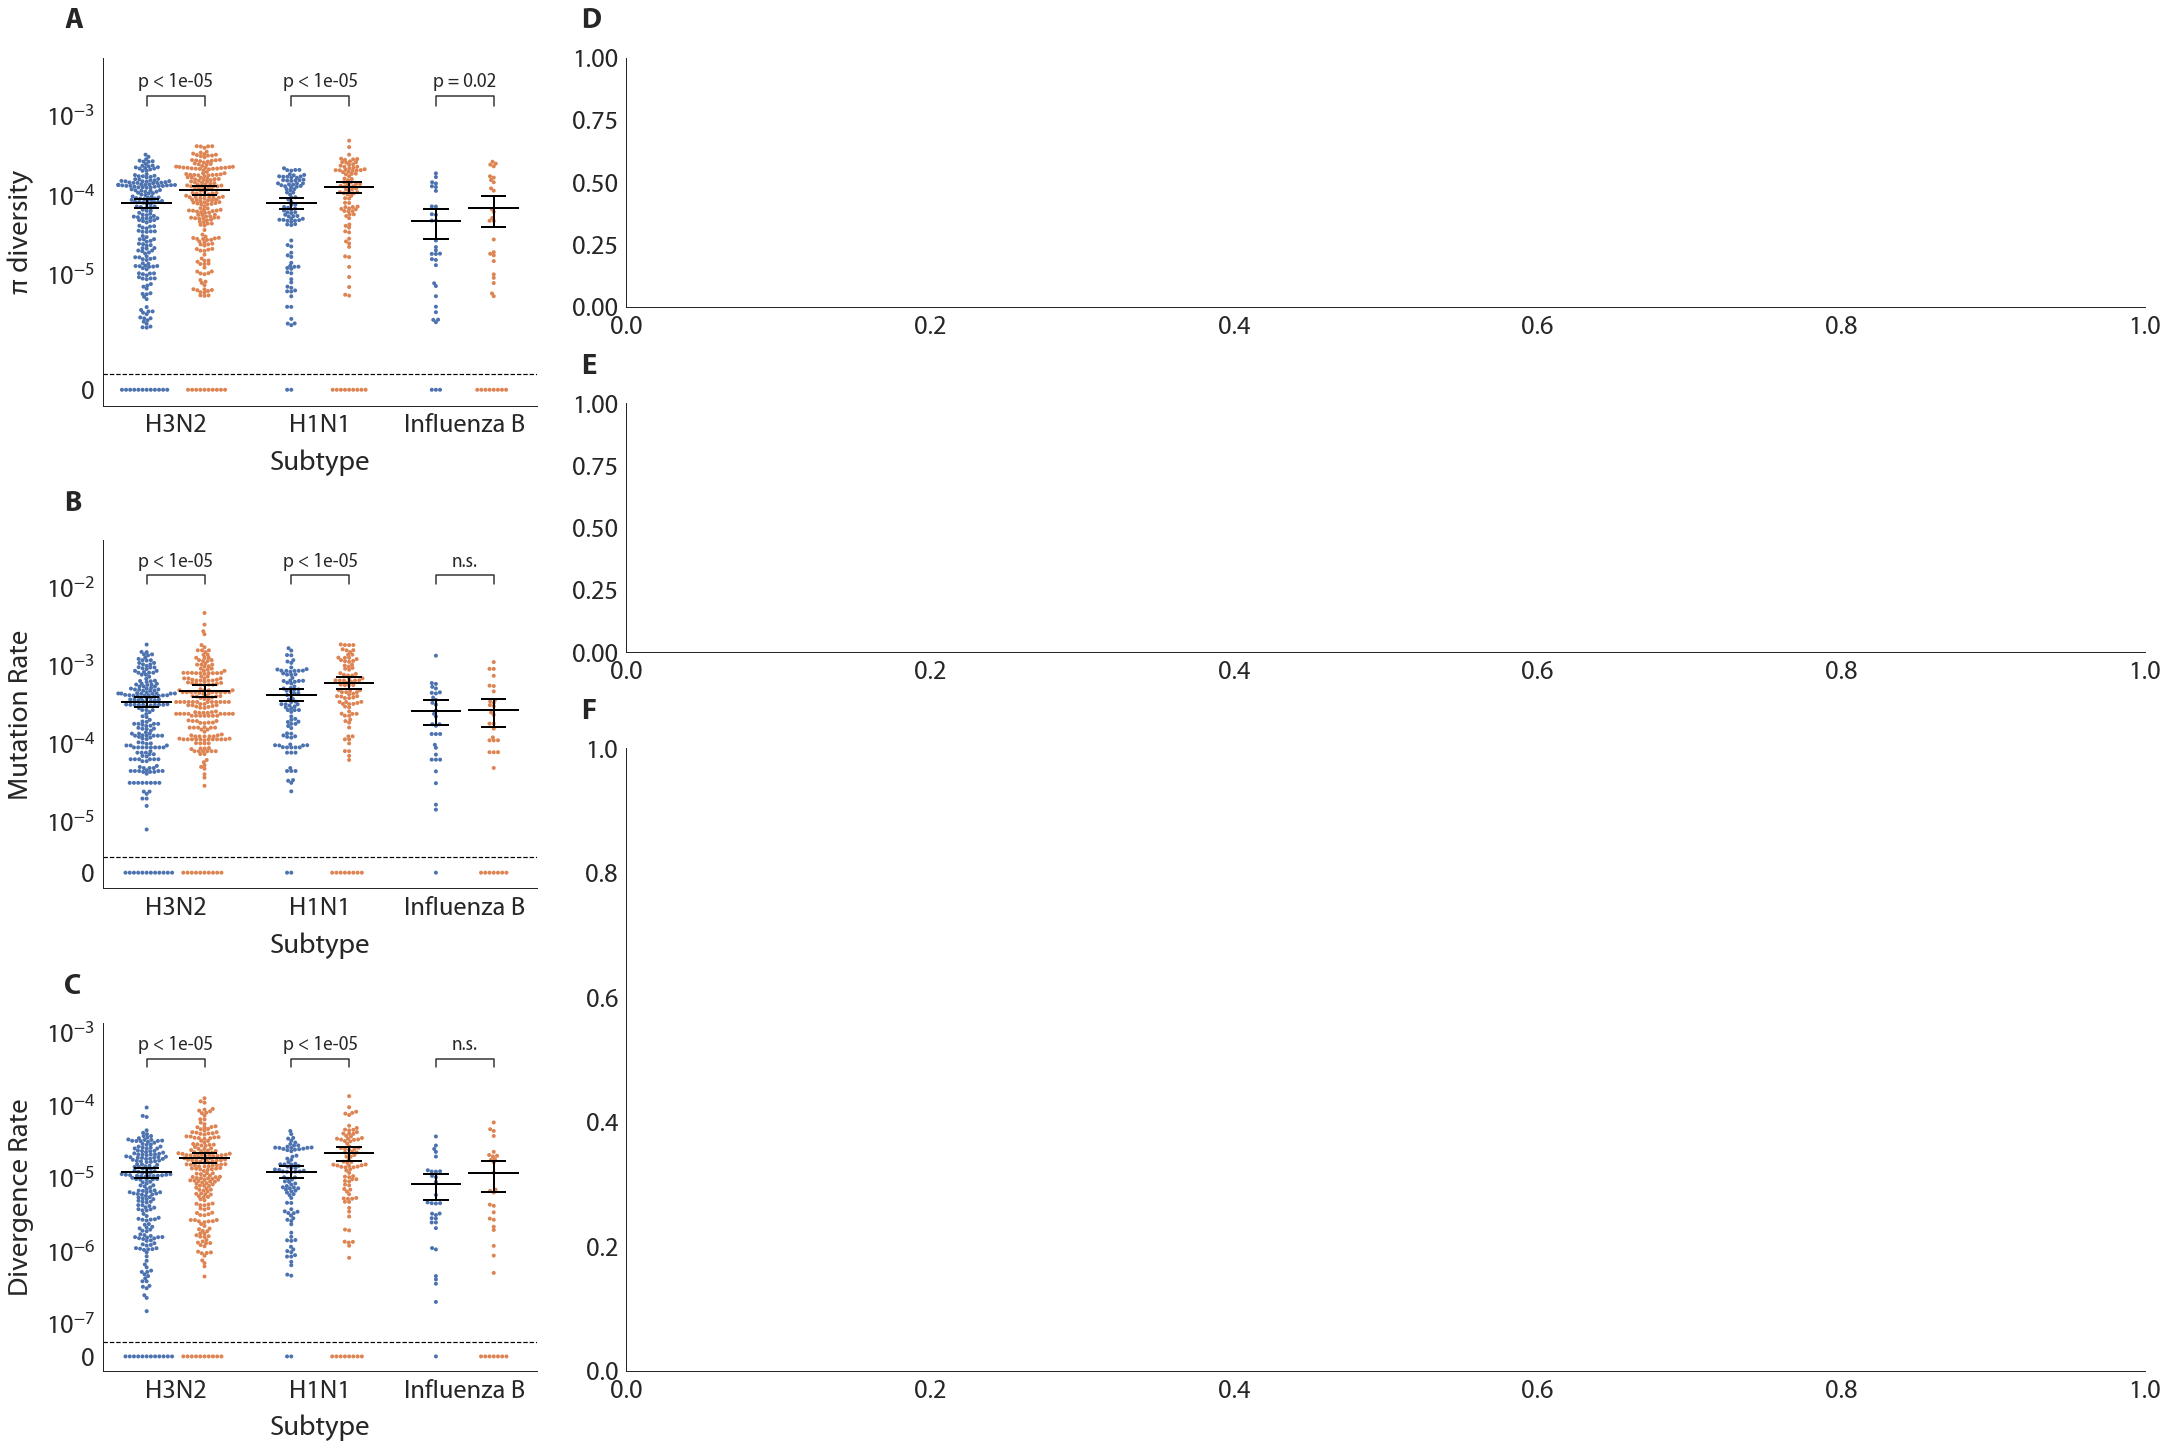

<Figure size 432x288 with 0 Axes>

In [16]:
#2c: N/S Divergence rate by subtype

# fig, ax2c = plt.subplots()
math_args = {'x': 'subtype',
            'y': 'divergence_rate',
            'hue':'Synon_Nonsynon',
            'data': NS_samples,#.loc[~pd.isna(NS_samples.mutation_rate_samp)&(NS_samples.mutation_rate_samp != np.inf)],
            'order': subtypeOrder,
            'hue_order':NS_order,
            'palette':palettes['subtype'], 
            'dodge':True,
            'ax': ax2c}

fig_args = math_args.copy()

fig_args['data'] = NS_samples.loc[NS_samples.divergence_rate >=0]

ax2c.set_yscale('log')

ax2c = swarmplot_with_zeros(fig_args, fig2, spacing=.2, gap_between_data_and_zero=.25, dotsize=4, jitter_zeros=False)

# ax2a.set_ylim(1e-7,5e-3)

del math_args['palette']
del math_args['dodge']
addStatsLines(**math_args)

# comparisons = [(('H3N2','Nonsynon'),('H1N1','Nonsynon')),(('Influenza B','Nonsynon'),('H3N2','Nonsynon')),(('Influenza B','Nonsynon'),('H1N1','Nonsynon'))]

comparisons = [((subtype,'Synon'),(subtype,'Nonsynon')) for subtype in NS_samples.subtype.unique()]

sigBar(test='paired_bootstrap',box_pairs=comparisons, **math_args, use_fixed_offset_from_top=True)

ax2c.set_ylabel(f'Divergence Rate', labelpad=x_labelpad)
ax2c.set_xlabel('Subtype', labelpad=y_labelpad)
ax2c.get_legend().remove()
fig2

In [17]:
NS_samples.loc[(NS_samples.mutation_rate_samp==0)&(NS_samples.pi_sample != 0), ['sampleID','pi_sample', 'Synon_Nonsynon']]

,sampleID,pi_sample,Synon_Nonsynon
252,19VR004702,0.000005,Synon


In [18]:
SNPs.loc[SNPs.sampleID=='19VR003373', ['product','pos','SNP_frequency', 'AAtype']]

,product,pos,SNP_frequency,AAtype
14923,PB1,578,0.9981,Synonymous
14924,NaN,10,1.0000,Out of reading frame
14925,NS1,64,0.9483,Synonymous
14929,HA,42,0.9984,Nonsynonymous
14931,NS1,560,0.0817,Nonsynonymous
14933,PA,1061,1.0000,Synonymous
14934,HA_nonantigenic,42,0.9984,Nonsynonymous
14937,NP,101,0.0100,Synonymous
14942,PB2,998,0.0133,Synonymous
14947,NEP,560,0.0817,Synonymous


In [19]:
#2d: piN/piS by gene – separate out antigenic/nonantigenic
# fig, ax2d = plt.subplots(figsize=(36,6))

fig_args = {'x': 'product',
            'y': 'pi_gene',
            'hue': 'Synon_Nonsynon',
            'data': NS_genes.loc[NS_genes.subtype!='Influenza B'].sort_values('sampleID'),
            'order': antigenicGeneOrder,
            'hue_order':NS_order,
            'ax': ax2d}


# fig_args['ax'].set_yscale('log')
sns.barplot(**fig_args, dodge=True, **errorBarArgs)
# fig_args['ax'].set_ylim(8e-6,1e-2)

# addStatsLines(**fig_args)
comparisons = [((cat, 'Nonsynon'), (cat,'Synon')) for cat in antigenicGeneOrder]
# comparisons = [(('Under 8','piN'),('8 to 18','piN')),(('Under 8','piN'), ('Over 18','piN')), (('8 to 18','piN'), ('Over 18','piN'))]
# comparisons += [(('Under 8','piS'),('8 to 18','piS')),(('Under 8','piS'), ('Over 18','piS')), (('8 to 18','piS'), ('Over 18','piS'))]
# comparisons = [(('18 or Under','piN'), ('Over 18','piN'))]
sigBar(test='bootstrap',box_pairs=comparisons, mult_comp_correction='fdr_tsbh',use_fixed_offset_from_top=True, **fig_args)
ax2d.set_ylabel(f'{pi} diversity', labelpad=x_labelpad)
ax2d.set_xlabel('Gene', labelpad=y_labelpad)
ax2d.set_xlim(-.75,13.75)
ax2d.set_xticklabels(antigenicGeneNames_withMinor)
ax2d.get_legend().remove()
# ax2d.axhline(fig_args['data'].loc[(fig_args['data']['product'].isin(['PB2','PB1','PA']))&(fig_args['data']['Synon_Nonsynon']=='Nonsynon'), 'pi_gene'].mean(),
#              color='red',
#              linestyle='dashed')

bootstrapping...
PB2_Nonsynon: 2.53296723080555e-05, PB2_Synon: 3.695982131009216e-05
PB2_Nonsynon is less than PB2_Synon: Non-parametric bootstrapped two-sided comparison, P_val=3.2e-04 stat=1.00e+05
(means: PB2_Nonsynon is less than PB2_Synon: 7.175412557571144e-05 vs 0.00011549871371353265)
bootstrapping...
PB1_Nonsynon: 4.004694558529048e-05, PB1_Synon: 5.065458491251833e-05
PB1_Nonsynon is less than PB1_Synon: Non-parametric bootstrapped two-sided comparison, P_val=< 1e-05 stat=1.00e+05
(means: PB1_Nonsynon is less than PB1_Synon: 8.086856350508077e-05 vs 0.00014302175653901913)
bootstrapping...
PB1-F2_Nonsynon: 0.0, PB1-F2_Synon: 0.0
PB1-F2_Nonsynon is equal to PB1-F2_Synon: Non-parametric bootstrapped two-sided comparison, P_val=0.99 stat=1.00e+05
(means: PB1-F2_Nonsynon is less than PB1-F2_Synon: 0.00010012654128941808 vs 0.00010101239703505066)
bootstrapping...
PA_Nonsynon: 2.4142362942851107e-05, PA_Synon: 3.5901582358050516e-05
PA_Nonsynon is less than PA_Synon: Non-parametr

<Figure size 432x288 with 0 Axes>

In [20]:
from matplotlib.ticker import FuncFormatter

bootstrapping...
PB2_Nonsynon: 3.1928230833161624e-06, PB2_Synon: 4.097318172491014e-06
PB2_Nonsynon is less than PB2_Synon: Non-parametric bootstrapped two-sided comparison, P_val=0.0013 stat=1.00e+05
(means: PB2_Nonsynon is less than PB2_Synon: 1.0409273778336468e-05 vs 1.954226294909308e-05)
bootstrapping...
PB1_Nonsynon: 5.365096586076136e-06, PB1_Synon: 6.57523378850243e-06
PB1_Nonsynon is less than PB1_Synon: Non-parametric bootstrapped two-sided comparison, P_val=< 1e-05 stat=1.00e+05
(means: PB1_Nonsynon is less than PB1_Synon: 1.1995595589011887e-05 vs 2.4896965369324603e-05)
bootstrapping...
PB1-F2_Nonsynon: 0.0, PB1-F2_Synon: 0.0
PB1-F2_Nonsynon is equal to PB1-F2_Synon: Non-parametric bootstrapped two-sided comparison, P_val=0.36 stat=1.00e+05
(means: PB1-F2_Nonsynon is less than PB1-F2_Synon: 1.3383485946284272e-05 vs 2.1064780571214128e-05)
bootstrapping...
PA_Nonsynon: 3.330025067495483e-06, PA_Synon: 2.7591884529827067e-06
PA_Nonsynon is greater than PA_Synon: Non-param

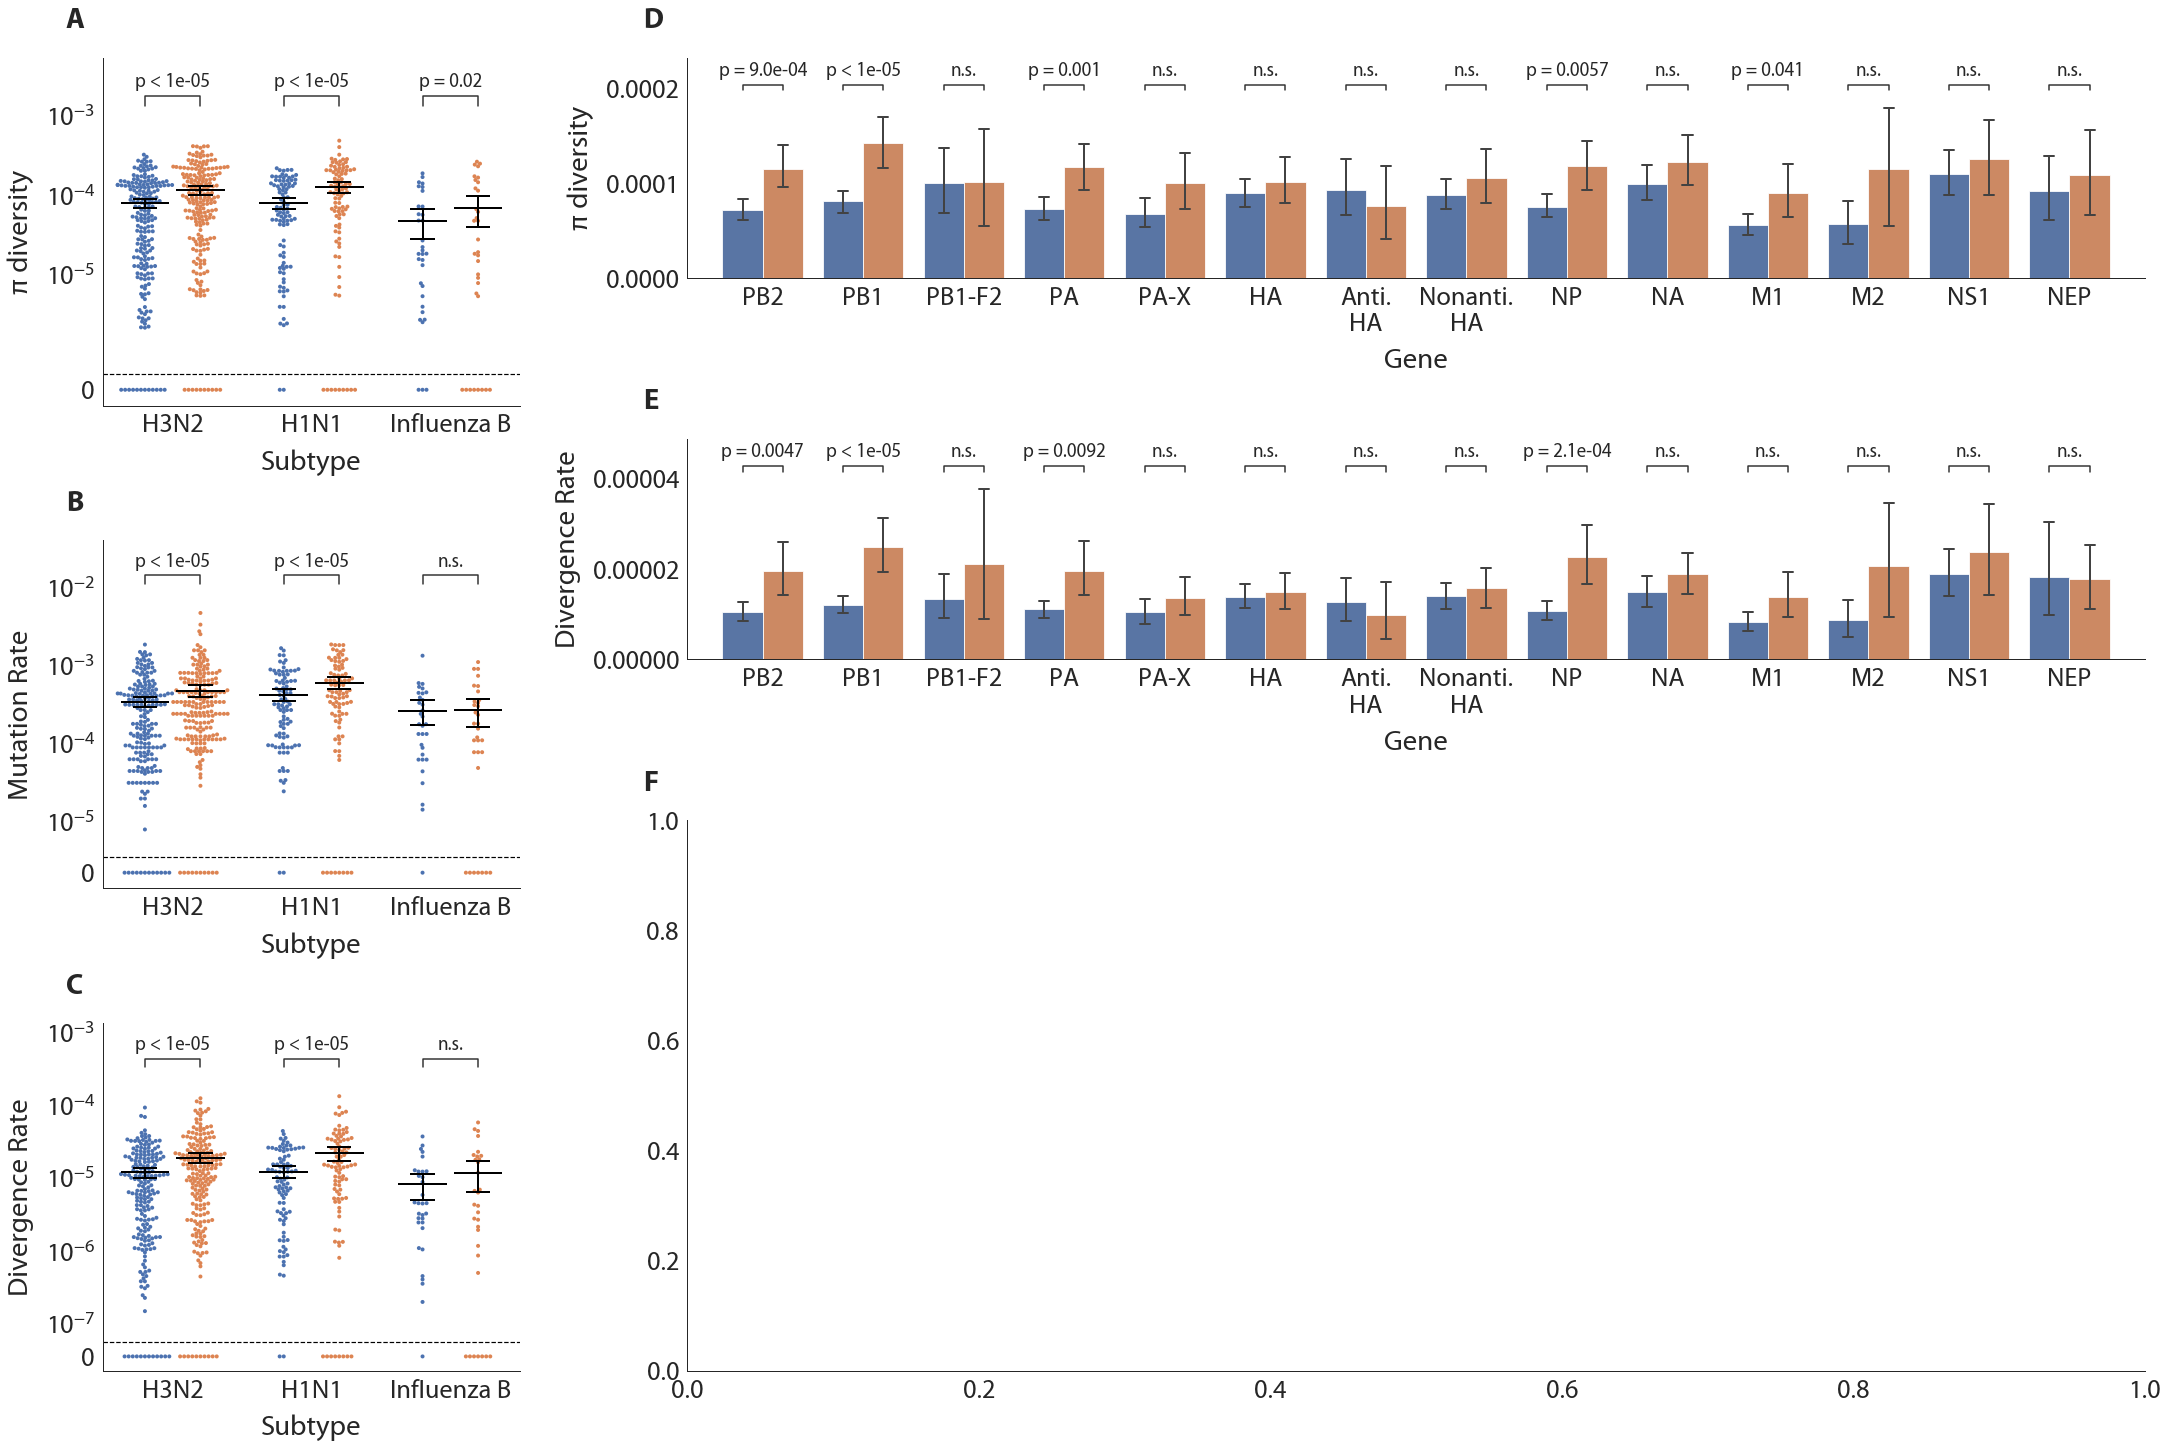

<Figure size 432x288 with 0 Axes>

In [21]:
#2e: piN/piS by gene – separate out antigenic/nonantigenic

# fig, ax2e = plt.subplots(figsize=(36,6))
fig_args = {'x': 'product',
            'y': 'divergence_rate_gene',
            'hue': 'Synon_Nonsynon',
            'data': NS_genes.loc[NS_genes.subtype!='Influenza B'].sort_values('sampleID'),
            'order': antigenicGeneOrder,
            'hue_order':NS_order,
            'ax': ax2e}


# fig_args['ax'].set_yscale('log')
sns.barplot(**fig_args, dodge=True, **errorBarArgs)
comparisons = [((cat, 'Nonsynon'), (cat,'Synon')) for cat in antigenicGeneOrder]
sigBar(test='bootstrap', box_pairs=comparisons, mult_comp_correction='fdr_tsbh',use_fixed_offset_from_top=True, **fig_args)
ax2e.set_ylabel(f'Divergence Rate', labelpad=x_labelpad)
ax2e.set_xlabel('Gene', labelpad=y_labelpad)
ax2e.set_xlim(-.75,13.75)
ax2e.set_xticklabels(antigenicGeneNames_withMinor)
ax2e.get_legend().remove()
# ax2e.axhline(fig_args['data'].loc[(fig_args['data']['product'].isin(['PB2','PB1','PA']))&(fig_args['data']['Synon_Nonsynon']=='Nonsynon'), fig_args['y']].mean(),
#              color='red',
#              linestyle='dashed')
f = lambda x, pos: f'{x:,.5f}'
ax2e.yaxis.set_major_formatter(FuncFormatter(f))
fig2

In [22]:
#2f: Minor frequency SNP locations - make manhattan plot
# fig, ax = plt.subplots(figsize=(24, 8))
ax_x_positions = makeManhattanPlot(ax = ax2f, data=SNPs.loc[SNPs.transformed_frequency>0.01], y='transformed_frequency', subtype='H3N2', hue='AAtype', antigenic=True)

PB2
PB1
PA
HA
[<matplotlib.axis.XTick object at 0x7f3f5de9baf0>, <matplotlib.axis.XTick object at 0x7f3f5de26310>, <matplotlib.axis.XTick object at 0x7f3f5ddbd190>, <matplotlib.axis.XTick object at 0x7f3f5ddb3d60>, <matplotlib.axis.XTick object at 0x7f3f5ddd3820>, <matplotlib.axis.XTick object at 0x7f3f5ddd3d30>]
HA_antigenic
HA_nonantigenic
NP
NA
M1
M2
NS1
NEP
PB1-F2
PA-X


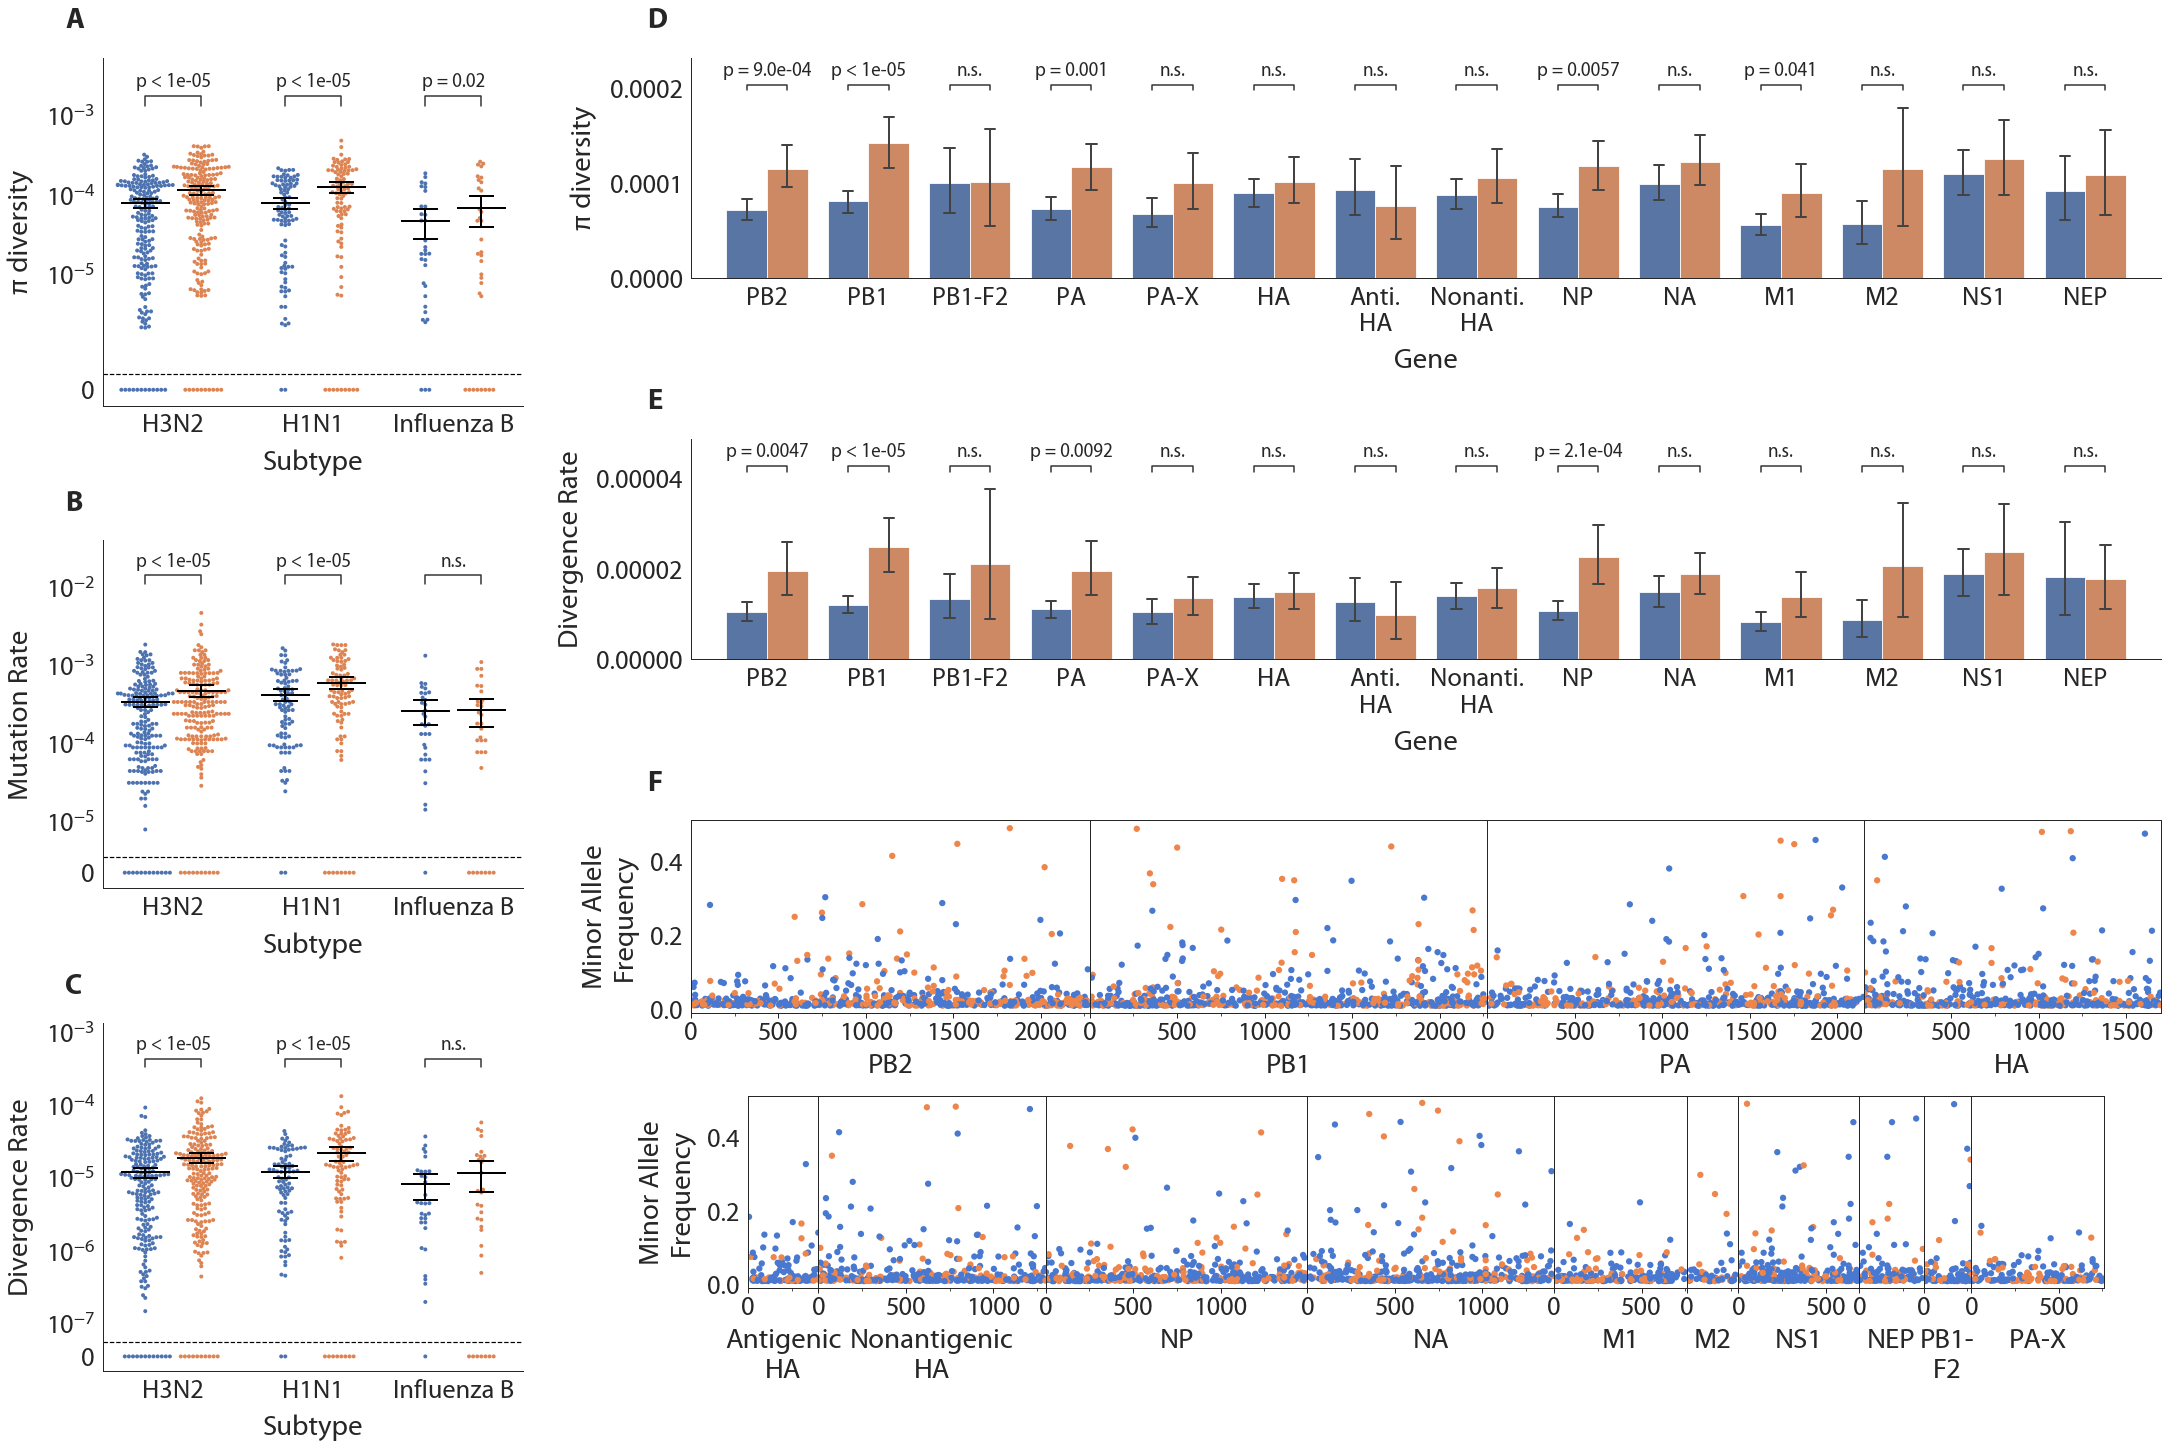

In [23]:
fig2

In [24]:
fig2.savefig('/mnt/d/orchards/fig2.svg', format='svg')

In [25]:
# NS_samples.columns

In [26]:
# relativerate = NS_samples.groupby('Synon_Nonsynon').mean().mutation_rate_samp
# relativerate.Synon/relativerate.Nonsynon

In [27]:
# relativerateSEM = NS_samples.groupby('Synon_Nonsynon').sem().mutation_rate_samp
# ((relativerateSEM.Synon*1.96/relativerate.Synon)**2 + (relativerateSEM.Nonsynon*1.96/relativerate.Synon)**2)**.5

In [28]:
# low = NS_genes.loc[(NS_genes['product'].isin(['PB2','PB1','PA','NP','M1','M2']))&(relativerate_g.Synon_Nonsynon=='Nonsynon')]
# high = NS_genes.loc[(NS_genes['product'].isin(['HA','NA','NEP','NS1']))&(relativerate_g.Synon_Nonsynon=='Nonsynon')]
# low = low.groupby('sampleID').mean()
# high = high.groupby('sampleID').mean()
# print(low.pi_gene.mean(), high.pi_gene.mean())
# print(low.pi_gene.sem()*1.96, high.pi_gene.sem()*1.96)

In [29]:
# print(low.divergence_rate_gene.mean(), high.divergence_rate_gene.mean())
# print(low.divergence_rate_gene.sem()*1.96, high.divergence_rate_gene.sem()*1.96)

In [30]:
# # stats.ttest_rel(low.pi_gene, high.pi_gene)
# stats.ttest_rel(low.divergence_rate_gene.dropna(), high.divergence_rate_gene.dropna())

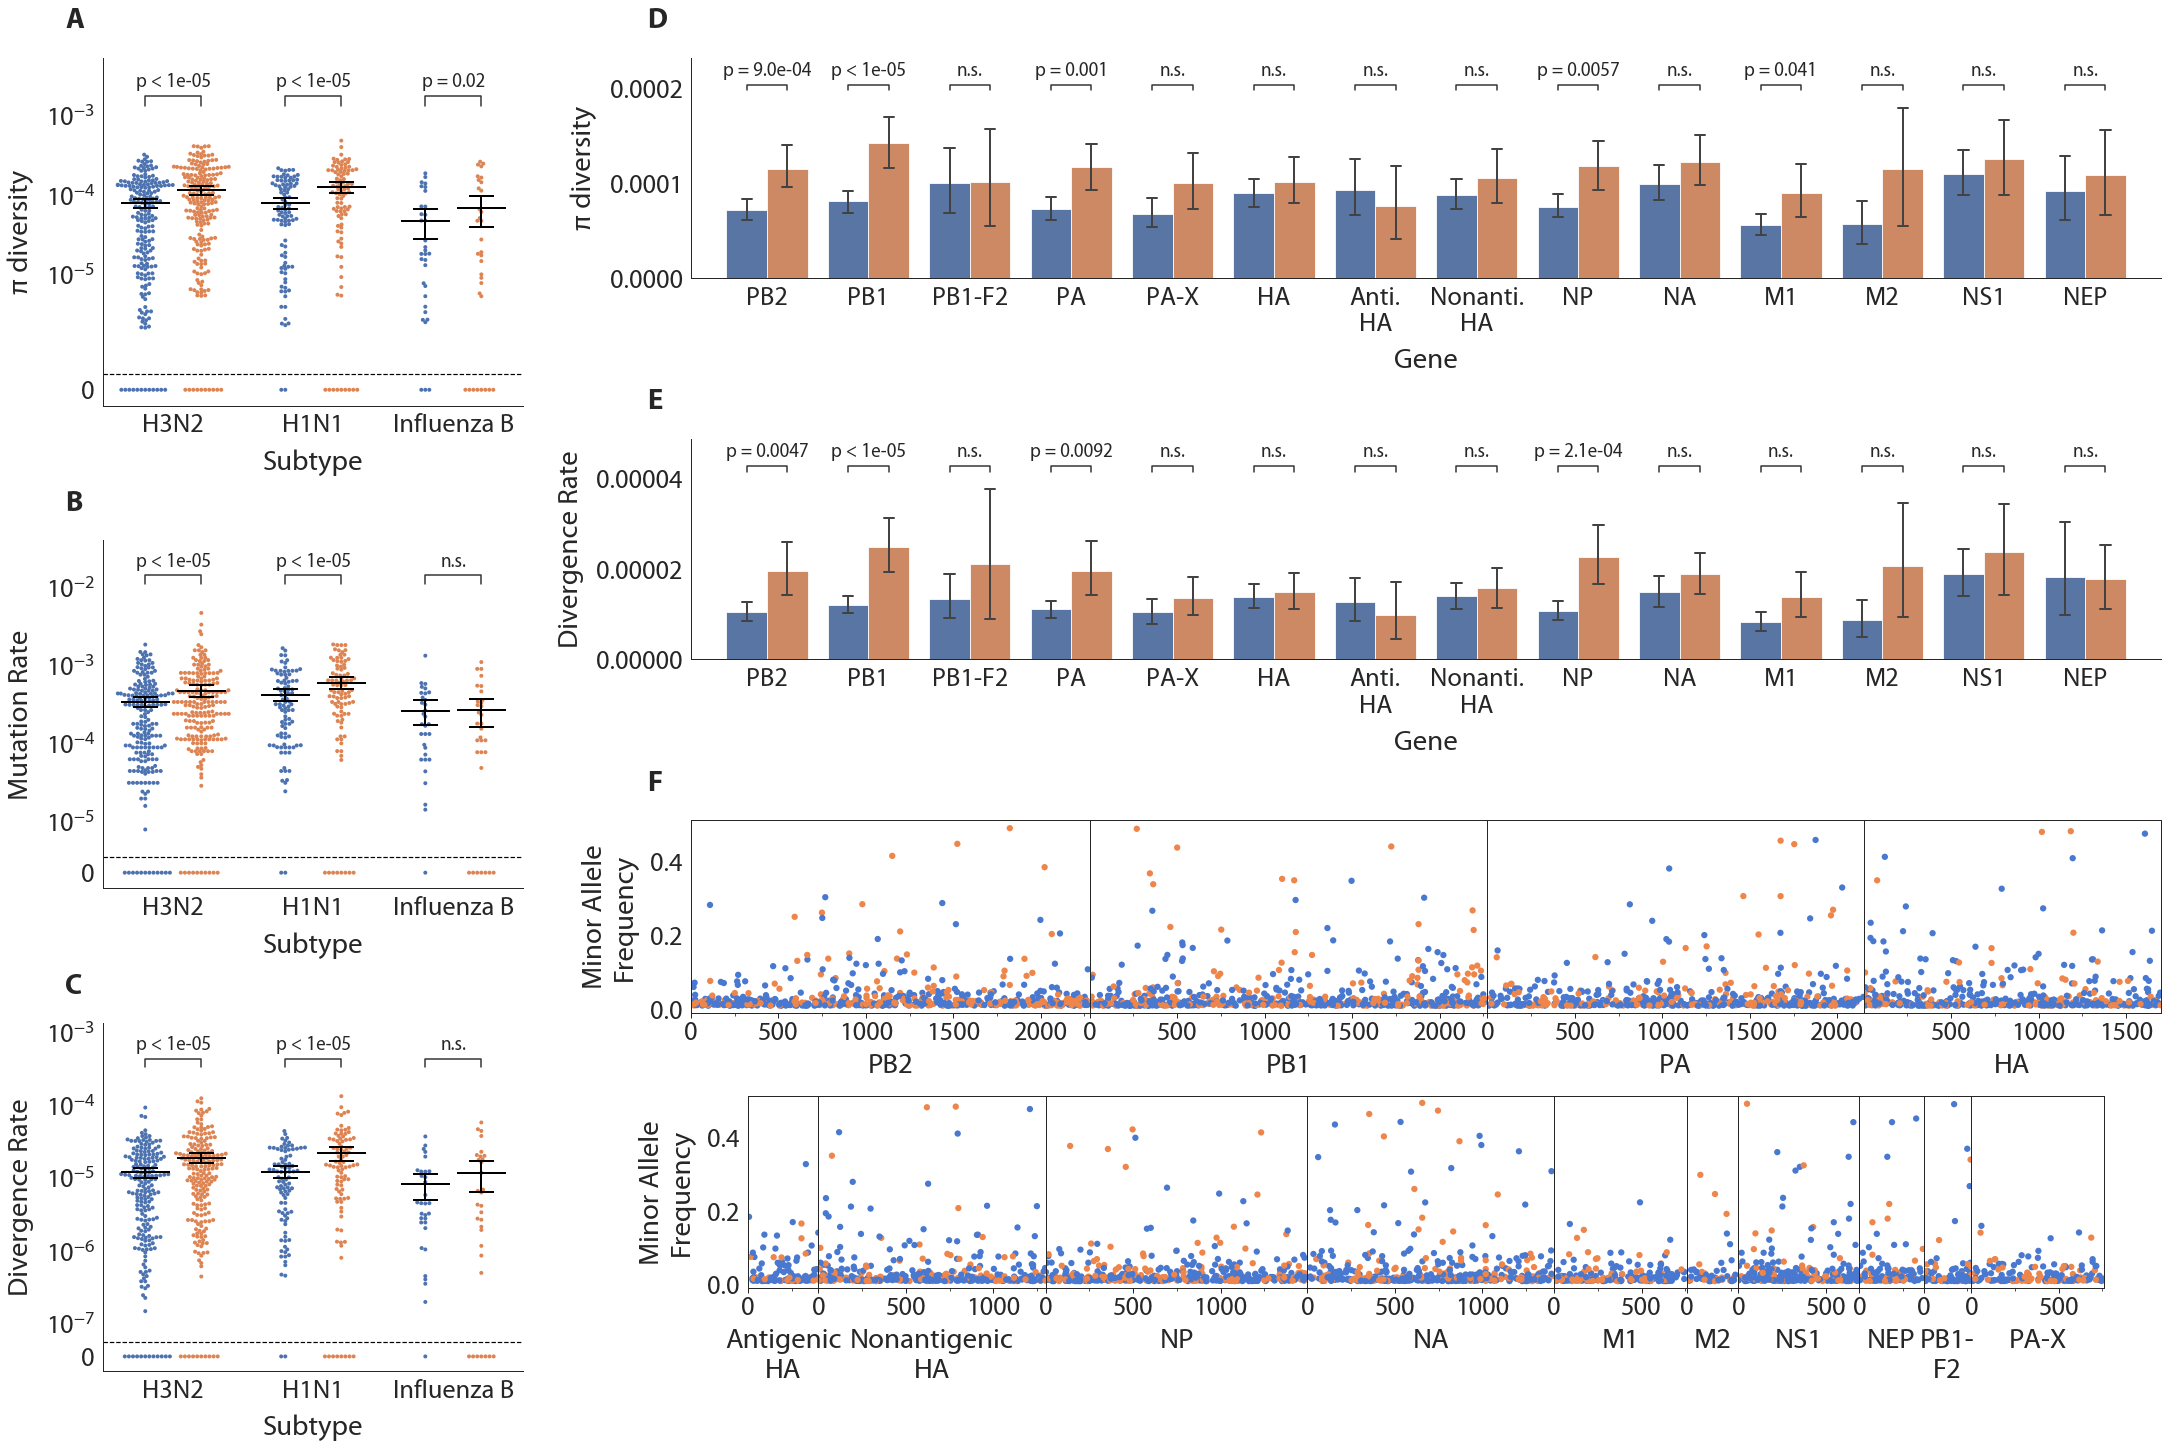

In [31]:
fig2

,sampleID,Synon_Nonsynon,pi_sample,mutation_rate_samp
11,17VR014029,Nonsynon,0.0,0.000000
55,17VR014896,Nonsynon,0.0,0.000000
60,17VR015078,Nonsynon,0.0,0.000000
95,18VR002212,Nonsynon,0.0,0.000000
173,18VR005308,Nonsynon,0.0,0.000000
178,18VR005799,Nonsynon,0.0,0.000044
183,18VR006203,Nonsynon,0.0,0.000014
184,18VR006427,Nonsynon,0.0,0.000000
196,19VR003002,Nonsynon,0.0,0.000000
211,19VR003373,Nonsynon,0.0,0.000000
